## Reinforcement learning
RL involves three key concepts:
- the agent
- some states
- set of  actions per state.

When the agent executes an action in a specified state, it gets a reward or penalty.
Imagine Super Mario.
Mario us the agent standing next to a cliff edge, and coin hangs above.
Marios position in the game level is the state.
If Mario moves one step to the right (an action) will take him over the edge. Now the agent get a penalty which is a low numerical score.
If Mario jump and get the coin, he get a reward which is a plus score.
Reinforcement learning and a simulator (the game), help you learn how to play the game to maximize the reward.  



### Game Description

**Objective:** Navigate an agent through a grid to reach a green square, while avoiding red squares that incur penalties.

**Grid Layout:**
- The game is played on a 6x6 grid.
- **Green Square:** Represents the goal. When the agent reaches this square, the game ends.
- **Red Squares:** Represent obstacles that incur a penalty. These are randomly placed on the grid and do not change between game resets.
- **Empty Squares:** Do not affect the agent’s score.

**Agent Behavior:**
- **Movement:** The agent can move up, down, left, or right.
- **Learning:** The agent avoids previously encountered red squares in future movements.
- **Action Selection:** The agent chooses moves that do not lead to previously encountered bad squares. If all possible moves lead to bad squares, it makes a random choice among all available moves.

**Game Rules:**
1. **Starting Position:** The agent begins at the top-left corner of the grid.
2. **Penalties and Rewards:**
   - Moving to a red square results in a penalty of -1.
   - Moving to an empty square results in a small reward of +1 if the move brings the agent closer to the green square.
   - Reaching the green square results in a reward of +10 and ends the game.
3. **Restarting:** Upon reaching the green square, the game pauses for a few seconds and then restarts with a new green square and agent position, but the red squares remain the same.
4. **Agent’s Learning:** The agent remembers red squares it has encountered and avoids these squares in future movements to improve its chances of successfully reaching the green square.

**Gameplay Flow:**
- The agent attempts to navigate the grid while avoiding red squares.
- If the agent reaches the green square, the game ends and restarts with updated positions for the green square and the agent.
- The agent's performance is influenced by its ability to avoid bad moves and reach the goal efficiently.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import random

# Constants
GRID_SIZE = 6
START_POSITION = (0, 0)  # Agent starts at the top-left corner
ACTIONS = ["up", "down", "left", "right"]

# Grid setup: 0 - Empty, 1 - Red (Penalty), 2 - Green (Goal)
def create_grid():
    grid = np.zeros((GRID_SIZE, GRID_SIZE), dtype=int)

    # Set random red squares
    num_red_squares = random.randint(5, 10)
    for _ in range(num_red_squares):
        i, j = random.randint(0, GRID_SIZE-1), random.randint(0, GRID_SIZE-1)
        if (i, j) != START_POSITION:
            grid[i, j] = 1

    # Set green square
    green_position = (random.randint(0, GRID_SIZE-1), random.randint(0, GRID_SIZE-1))
    while grid[green_position] == 1:
        green_position = (random.randint(0, GRID_SIZE-1), random.randint(0, GRID_SIZE-1))

    grid[green_position] = 2
    return grid, green_position

# Visualization function
def plot_grid(grid, agent_position):
    plt.figure(figsize=(6, 6))
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            if grid[i, j] == 1:
                plt.fill_between([j, j+1], i, i+1, color='red')
            elif grid[i, j] == 2:
                plt.fill_between([j, j+1], i, i+1, color='green')
            else:
                plt.fill_between([j, j+1], i, i+1, color='white', edgecolor='black')

    # Agent's position
    plt.plot(agent_position[1] + 0.5, agent_position[0] + 0.5, 'bo', markersize=20)
    plt.xlim(0, GRID_SIZE)
    plt.ylim(0, GRID_SIZE)
    plt.gca().invert_yaxis()
    plt.show()

# Define the environment class
class GridEnvironment:
    def __init__(self):
        self.grid, self.green_position = create_grid()
        self.agent_position = START_POSITION
        self.is_done = False

    def reset(self):
        self.grid, self.green_position = create_grid()
        self.agent_position = START_POSITION
        self.is_done = False
        return self.agent_position

    def step(self, action):
        if self.is_done:
            return self.agent_position, 0, self.is_done

        i, j = self.agent_position
        if action == "up":
            i = max(0, i - 1)
        elif action == "down":
            i = min(GRID_SIZE - 1, i + 1)
        elif action == "left":
            j = max(0, j - 1)
        elif action == "right":
            j = min(GRID_SIZE - 1, j + 1)

        new_position = (i, j)
        reward = -1  # Default penalty

        if self.grid[new_position] == 1:
            reward = -1
        elif self.grid[new_position] == 2:
            reward = 10
            self.is_done = True
        else:
            if abs(i - self.green_position[0]) + abs(j - self.green_position[1]) < \
               abs(self.agent_position[0] - self.green_position[0]) + abs(self.agent_position[1] - self.green_position[1]):
                reward = 1

        self.agent_position = new_position
        return new_position, reward, self.is_done

# Define a simple random agent
class RandomAgent:
    def __init__(self):
        self.actions = ACTIONS

    def get_action(self):
        return random.choice(self.actions)

# Initialize environment and agent
env = GridEnvironment()
agent = RandomAgent()

# Run the simulation
for episode in range(10):  # Run 10 episodes
    state = env.reset()
    total_reward = 0

    while not env.is_done:
        clear_output(wait=True)
        plot_grid(env.grid, env.agent_position)

        action = agent.get_action()
        next_state, reward, done = env.step(action)
        total_reward += reward

    print(f"Episode {episode + 1} finished with total reward: {total_reward}")

clear_output(wait=True)
plot_grid(env.grid, env.agent_position)


KeyboardInterrupt: 

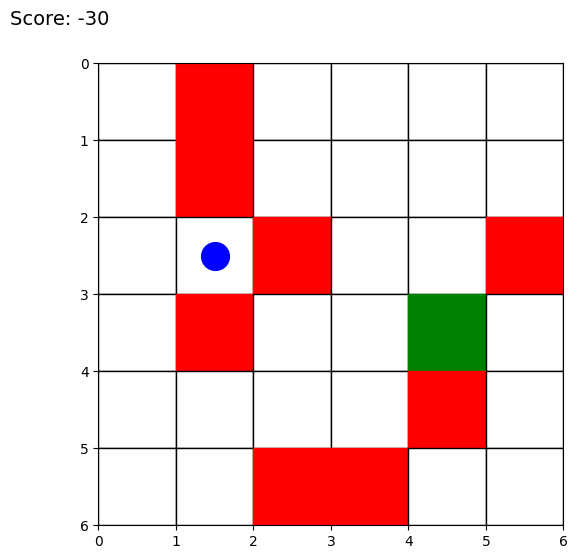

KeyboardInterrupt: 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import random
import time

# Constants
GRID_SIZE = 6
START_POSITION = (0, 0)  # Agent starts at the top-left corner
ACTIONS = ["up", "down", "left", "right"]

# Grid setup: 0 - Empty, 1 - Red (Penalty), 2 - Green (Goal)
def create_grid():
    grid = np.zeros((GRID_SIZE, GRID_SIZE), dtype=int)

    # Set random red squares
    num_red_squares = random.randint(5, 10)
    for _ in range(num_red_squares):
        i, j = random.randint(0, GRID_SIZE-1), random.randint(0, GRID_SIZE-1)
        if (i, j) != START_POSITION:
            grid[i, j] = 1

    # Set green square
    green_position = (random.randint(0, GRID_SIZE-1), random.randint(0, GRID_SIZE-1))
    while grid[green_position] == 1:
        green_position = (random.randint(0, GRID_SIZE-1), random.randint(0, GRID_SIZE-1))

    grid[green_position] = 2
    return grid, green_position

# Visualization function
def plot_grid(grid, agent_position, total_reward):
    plt.figure(figsize=(6, 6))
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            if grid[i, j] == 1:
                plt.fill_between([j, j+1], i, i+1, color='red')
            elif grid[i, j] == 2:
                plt.fill_between([j, j+1], i, i+1, color='green')
            else:
                plt.fill_between([j, j+1], i, i+1, color='white', edgecolor='black')

    # Agent's position
    plt.plot(agent_position[1] + 0.5, agent_position[0] + 0.5, 'bo', markersize=20)

    # Display the score
    plt.text(-0.5, -0.5, f"Score: {total_reward}", fontsize=14, ha='center')

    plt.xlim(0, GRID_SIZE)
    plt.ylim(0, GRID_SIZE)
    plt.gca().invert_yaxis()
    plt.show()

# Define the environment class
class GridEnvironment:
    def __init__(self):
        self.grid, self.green_position = create_grid()
        self.agent_position = START_POSITION
        self.is_done = False
        self.failed_moves = set()  # Track failed moves

    def reset(self):
        self.grid, self.green_position = create_grid()
        self.agent_position = START_POSITION
        self.is_done = False
        self.failed_moves = set()
        return self.agent_position

    def step(self, action):
        if self.is_done:
            return self.agent_position, 0, self.is_done

        i, j = self.agent_position
        if action == "up":
            i = max(0, i - 1)
        elif action == "down":
            i = min(GRID_SIZE - 1, i + 1)
        elif action == "left":
            j = max(0, j - 1)
        elif action == "right":
            j = min(GRID_SIZE - 1, j + 1)

        new_position = (i, j)
        reward = -1  # Default penalty

        if self.grid[new_position] == 1:  # Red square
            reward = -1
            self.failed_moves.add(new_position)  # Record the failed move
        elif self.grid[new_position] == 2:  # Green square
            reward = 10
            self.is_done = True
        else:
            if abs(i - self.green_position[0]) + abs(j - self.green_position[1]) < \
               abs(self.agent_position[0] - self.green_position[0]) + abs(self.agent_position[1] - self.green_position[1]):
                reward = 1

        self.agent_position = new_position
        return new_position, reward, self.is_done

# Define a simple random agent
class RandomAgent:
    def __init__(self):
        self.actions = ACTIONS

    def get_action(self, failed_moves):
        valid_actions = []
        for action in self.actions:
            new_position = self.simulate_move(action)
            if new_position not in failed_moves:
                valid_actions.append(action)
        return random.choice(valid_actions) if valid_actions else random.choice(self.actions)

    def simulate_move(self, action):
        i, j = env.agent_position
        if action == "up":
            i = max(0, i - 1)
        elif action == "down":
            i = min(GRID_SIZE - 1, i + 1)
        elif action == "left":
            j = max(0, j - 1)
        elif action == "right":
            j = min(GRID_SIZE - 1, j + 1)
        return (i, j)

# Initialize environment and agent
env = GridEnvironment()
agent = RandomAgent()

# Run the simulation
for episode in range(10):  # Run 10 episodes
    state = env.reset()
    total_reward = 0
    time_gap = 1.0  # Initial time gap

    while not env.is_done:
        clear_output(wait=True)
        plot_grid(env.grid, env.agent_position, total_reward)

        action = agent.get_action(env.failed_moves)
        next_state, reward, done = env.step(action)
        total_reward += reward

        time.sleep(time_gap)

        if done:
            time_gap *= 3  # Increase the time gap threefold when reaching the green square

    time_gap = 1.0  # Reset the time gap after each episode
    print(f"Episode {episode + 1} finished with total reward: {total_reward}")

clear_output(wait=True)
plot_grid(env.grid, env.agent_position, total_reward)


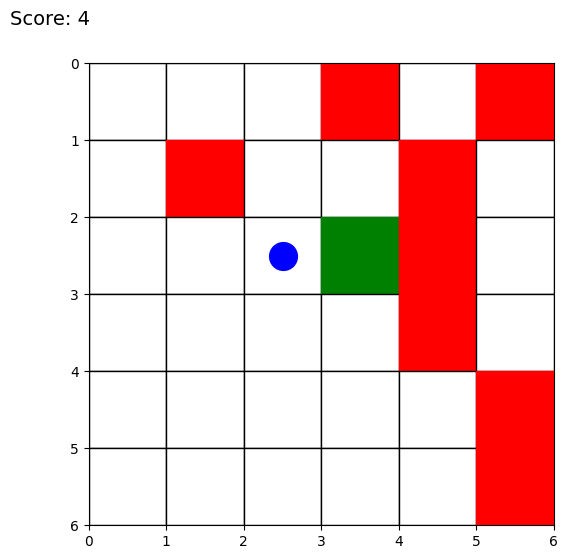

KeyboardInterrupt: 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import random
import time

# Constants
GRID_SIZE = 6
START_POSITION = (0, 0)  # Agent starts at the top-left corner
ACTIONS = ["up", "down", "left", "right"]

# Grid setup: 0 - Empty, 1 - Red (Penalty), 2 - Green (Goal)
def create_grid():
    grid = np.zeros((GRID_SIZE, GRID_SIZE), dtype=int)

    # Set random red squares
    num_red_squares = random.randint(5, 10)
    for _ in range(num_red_squares):
        i, j = random.randint(0, GRID_SIZE-1), random.randint(0, GRID_SIZE-1)
        if (i, j) != START_POSITION:
            grid[i, j] = 1

    # Set green square
    green_position = (random.randint(0, GRID_SIZE-1), random.randint(0, GRID_SIZE-1))
    while grid[green_position] == 1:
        green_position = (random.randint(0, GRID_SIZE-1), random.randint(0, GRID_SIZE-1))

    grid[green_position] = 2
    return grid, green_position

# Visualization function
def plot_grid(grid, agent_position, total_reward):
    plt.figure(figsize=(6, 6))
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            if grid[i, j] == 1:
                plt.fill_between([j, j+1], i, i+1, color='red')
            elif grid[i, j] == 2:
                plt.fill_between([j, j+1], i, i+1, color='green')
            else:
                plt.fill_between([j, j+1], i, i+1, color='white', edgecolor='black')

    # Agent's position
    plt.plot(agent_position[1] + 0.5, agent_position[0] + 0.5, 'bo', markersize=20)

    # Display the score
    plt.text(-0.5, -0.5, f"Score: {total_reward}", fontsize=14, ha='center')

    plt.xlim(0, GRID_SIZE)
    plt.ylim(0, GRID_SIZE)
    plt.gca().invert_yaxis()
    plt.show()

# Define the environment class
class GridEnvironment:
    def __init__(self):
        self.grid, self.green_position = create_grid()
        self.agent_position = START_POSITION
        self.is_done = False
        self.failed_moves = set()  # Track failed moves

    def reset(self):
        self.grid, self.green_position = create_grid()
        self.agent_position = START_POSITION
        self.is_done = False
        self.failed_moves = set()
        return self.agent_position

    def step(self, action):
        if self.is_done:
            return self.agent_position, 0, self.is_done

        i, j = self.agent_position
        if action == "up":
            i = max(0, i - 1)
        elif action == "down":
            i = min(GRID_SIZE - 1, i + 1)
        elif action == "left":
            j = max(0, j - 1)
        elif action == "right":
            j = min(GRID_SIZE - 1, j + 1)

        new_position = (i, j)
        reward = -1  # Default penalty

        if self.grid[new_position] == 1:  # Red square
            reward = -1
            self.failed_moves.add(new_position)  # Record the failed move
        elif self.grid[new_position] == 2:  # Green square
            reward = 10
            self.is_done = True
        else:
            if abs(i - self.green_position[0]) + abs(j - self.green_position[1]) < \
               abs(self.agent_position[0] - self.green_position[0]) + abs(self.agent_position[1] - self.green_position[1]):
                reward = 1

        self.agent_position = new_position
        return new_position, reward, self.is_done

# Define a simple agent that calculates the best direction to move
class SmartAgent:
    def __init__(self, grid_env):
        self.actions = ACTIONS
        self.env = grid_env

    def get_action(self):
        min_distance = float('inf')
        best_action = None

        for action in self.actions:
            new_position = self.simulate_move(action)
            if new_position in self.env.failed_moves:
                continue  # Skip failed moves
            distance = self.manhattan_distance(new_position, self.env.green_position)
            if distance < min_distance:
                min_distance = distance
                best_action = action

        return best_action if best_action else random.choice(self.actions)

    def simulate_move(self, action):
        i, j = self.env.agent_position
        if action == "up":
            i = max(0, i - 1)
        elif action == "down":
            i = min(GRID_SIZE - 1, i + 1)
        elif action == "left":
            j = max(0, j - 1)
        elif action == "right":
            j = min(GRID_SIZE - 1, j + 1)
        return (i, j)

    def manhattan_distance(self, position1, position2):
        return abs(position1[0] - position2[0]) + abs(position1[1] - position2[1])

# Initialize environment and agent
env = GridEnvironment()
agent = SmartAgent(env)

# Run the simulation
for episode in range(10):  # Run 10 episodes
    state = env.reset()
    total_reward = 0
    time_gap = 1.0  # Initial time gap

    while not env.is_done:
        clear_output(wait=True)
        plot_grid(env.grid, env.agent_position, total_reward)

        action = agent.get_action()
        next_state, reward, done = env.step(action)
        total_reward += reward

        time.sleep(time_gap)

        if done:
            time_gap *= 3  # Increase the time gap threefold when reaching the green square

    time_gap = 1.0  # Reset the time gap after each episode
    print(f"Episode {episode + 1} finished with total reward: {total_reward}")

clear_output(wait=True)
plot_grid(env.grid, env.agent_position, total_reward)


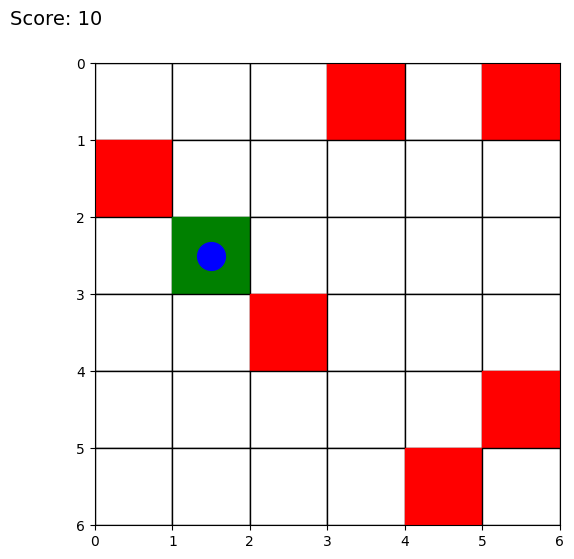

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import random
import time

# Constants
GRID_SIZE = 6
START_POSITION = (0, 0)  # Agent starts at the top-left corner
ACTIONS = ["up", "down", "left", "right"]

# Grid setup: 0 - Empty, 1 - Red (Penalty), 2 - Green (Goal)
def create_grid():
    grid = np.zeros((GRID_SIZE, GRID_SIZE), dtype=int)

    # Set random red squares
    num_red_squares = random.randint(5, 10)
    for _ in range(num_red_squares):
        i, j = random.randint(0, GRID_SIZE-1), random.randint(0, GRID_SIZE-1)
        if (i, j) != START_POSITION:
            grid[i, j] = 1

    # Set green square
    green_position = (random.randint(0, GRID_SIZE-1), random.randint(0, GRID_SIZE-1))
    while grid[green_position] == 1:
        green_position = (random.randint(0, GRID_SIZE-1), random.randint(0, GRID_SIZE-1))

    grid[green_position] = 2
    return grid, green_position

# Visualization function
def plot_grid(grid, agent_position, total_reward):
    plt.figure(figsize=(6, 6))
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            if grid[i, j] == 1:
                plt.fill_between([j, j+1], i, i+1, color='red')
            elif grid[i, j] == 2:
                plt.fill_between([j, j+1], i, i+1, color='green')
            else:
                plt.fill_between([j, j+1], i, i+1, color='white', edgecolor='black')

    # Agent's position
    plt.plot(agent_position[1] + 0.5, agent_position[0] + 0.5, 'bo', markersize=20)

    # Display the score
    plt.text(-0.5, -0.5, f"Score: {total_reward}", fontsize=14, ha='center')

    plt.xlim(0, GRID_SIZE)
    plt.ylim(0, GRID_SIZE)
    plt.gca().invert_yaxis()
    plt.show()

# Define the environment class
class GridEnvironment:
    def __init__(self):
        self.grid, self.green_position = create_grid()
        self.agent_position = START_POSITION
        self.is_done = False
        self.failed_moves = set()  # Track failed moves

    def reset(self):
        self.grid, self.green_position = create_grid()
        self.agent_position = START_POSITION
        self.is_done = False
        self.failed_moves = set()
        return self.agent_position

    def step(self, action):
        if self.is_done:
            return self.agent_position, 0, self.is_done

        i, j = self.agent_position
        if action == "up":
            i = max(0, i - 1)
        elif action == "down":
            i = min(GRID_SIZE - 1, i + 1)
        elif action == "left":
            j = max(0, j - 1)
        elif action == "right":
            j = min(GRID_SIZE - 1, j + 1)

        new_position = (i, j)
        reward = -1  # Default penalty

        if self.grid[new_position] == 1:  # Red square
            reward = -1
            self.failed_moves.add(new_position)  # Record the failed move
        elif self.grid[new_position] == 2:  # Green square
            reward = 10
            self.is_done = True
        else:
            if abs(i - self.green_position[0]) + abs(j - self.green_position[1]) < \
               abs(self.agent_position[0] - self.green_position[0]) + abs(self.agent_position[1] - self.green_position[1]):
                reward = 1

        self.agent_position = new_position
        return new_position, reward, self.is_done

# Define a simple agent that calculates the best direction to move
class SmartAgent:
    def __init__(self, grid_env):
        self.actions = ACTIONS
        self.env = grid_env

    def get_action(self):
        min_distance = float('inf')
        best_action = None

        for action in self.actions:
            new_position = self.simulate_move(action)
            if new_position in self.env.failed_moves:
                continue  # Skip failed moves
            distance = self.manhattan_distance(new_position, self.env.green_position)
            if distance < min_distance:
                min_distance = distance
                best_action = action

        return best_action if best_action else random.choice(self.actions)

    def simulate_move(self, action):
        i, j = self.env.agent_position
        if action == "up":
            i = max(0, i - 1)
        elif action == "down":
            i = min(GRID_SIZE - 1, i + 1)
        elif action == "left":
            j = max(0, j - 1)
        elif action == "right":
            j = min(GRID_SIZE - 1, j + 1)
        return (i, j)

    def manhattan_distance(self, position1, position2):
        return abs(position1[0] - position2[0]) + abs(position1[1] - position2[1])

# Initialize environment and agent
env = GridEnvironment()
agent = SmartAgent(env)

# Run the simulation
for episode in range(10):  # Run 10 episodes
    state = env.reset()
    total_reward = 0
    time_gap = 1.0  # Initial time gap

    while not env.is_done:
        clear_output(wait=True)
        plot_grid(env.grid, env.agent_position, total_reward)

        action = agent.get_action()
        next_state, reward, done = env.step(action)
        total_reward += reward

        time.sleep(time_gap)

        if done:
            clear_output(wait=True)
            plot_grid(env.grid, env.agent_position, total_reward)
            time.sleep(time_gap * 3)  # Stay on the green square for some time
            break  # End the current episode

    time_gap = 1.0  # Reset the time gap after each episode
    print(f"Episode {episode + 1} finished with total reward: {total_reward}")

clear_output(wait=True)
plot_grid(env.grid, env.agent_position, total_reward)


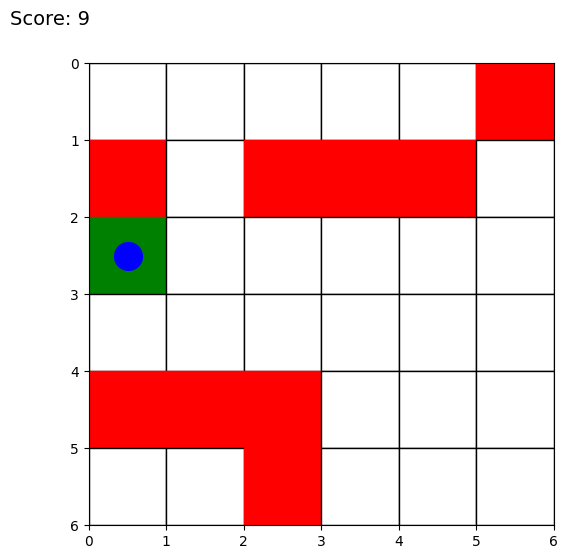

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import random
import time

# Constants
GRID_SIZE = 6
START_POSITION = (0, 0)  # Agent starts at the top-left corner
ACTIONS = ["up", "down", "left", "right"]

# Grid setup: 0 - Empty, 1 - Red (Penalty), 2 - Green (Goal)
def create_grid():
    grid = np.zeros((GRID_SIZE, GRID_SIZE), dtype=int)

    # Set random red squares
    num_red_squares = random.randint(5, 10)
    for _ in range(num_red_squares):
        i, j = random.randint(0, GRID_SIZE-1), random.randint(0, GRID_SIZE-1)
        if (i, j) != START_POSITION:
            grid[i, j] = 1

    return grid

def set_green_square(grid):
    green_position = (random.randint(0, GRID_SIZE-1), random.randint(0, GRID_SIZE-1))
    while grid[green_position] == 1:
        green_position = (random.randint(0, GRID_SIZE-1), random.randint(0, GRID_SIZE-1))

    grid[green_position] = 2
    return green_position

# Visualization function
def plot_grid(grid, agent_position, total_reward):
    plt.figure(figsize=(6, 6))
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            if grid[i, j] == 1:
                plt.fill_between([j, j+1], i, i+1, color='red')
            elif grid[i, j] == 2:
                plt.fill_between([j, j+1], i, i+1, color='green')
            else:
                plt.fill_between([j, j+1], i, i+1, color='white', edgecolor='black')

    # Agent's position
    plt.plot(agent_position[1] + 0.5, agent_position[0] + 0.5, 'bo', markersize=20)

    # Display the score
    plt.text(-0.5, -0.5, f"Score: {total_reward}", fontsize=14, ha='center')

    plt.xlim(0, GRID_SIZE)
    plt.ylim(0, GRID_SIZE)
    plt.gca().invert_yaxis()
    plt.show()

# Define the environment class
class GridEnvironment:
    def __init__(self):
        self.grid = create_grid()
        self.green_position = set_green_square(self.grid)
        self.agent_position = START_POSITION
        self.is_done = False
        self.failed_moves = set()  # Track failed moves

    def reset(self):
        # Clear the old green position and set a new one
        self.grid[self.green_position] = 0
        self.green_position = set_green_square(self.grid)
        self.agent_position = START_POSITION
        self.is_done = False
        self.failed_moves = set()
        return self.agent_position

    def step(self, action):
        if self.is_done:
            return self.agent_position, 0, self.is_done

        i, j = self.agent_position
        if action == "up":
            i = max(0, i - 1)
        elif action == "down":
            i = min(GRID_SIZE - 1, i + 1)
        elif action == "left":
            j = max(0, j - 1)
        elif action == "right":
            j = min(GRID_SIZE - 1, j + 1)

        new_position = (i, j)
        reward = -1  # Default penalty

        if self.grid[new_position] == 1:  # Red square
            reward = -1
            self.failed_moves.add(new_position)  # Record the failed move
        elif self.grid[new_position] == 2:  # Green square
            reward = 10
            self.is_done = True
        else:
            if abs(i - self.green_position[0]) + abs(j - self.green_position[1]) < \
               abs(self.agent_position[0] - self.green_position[0]) + abs(self.agent_position[1] - self.green_position[1]):
                reward = 1

        self.agent_position = new_position
        return new_position, reward, self.is_done

# Define a simple agent that calculates the best direction to move
class SmartAgent:
    def __init__(self, grid_env):
        self.actions = ACTIONS
        self.env = grid_env

    def get_action(self):
        min_distance = float('inf')
        best_action = None

        for action in self.actions:
            new_position = self.simulate_move(action)
            if new_position in self.env.failed_moves:
                continue  # Skip failed moves
            distance = self.manhattan_distance(new_position, self.env.green_position)
            if distance < min_distance:
                min_distance = distance
                best_action = action

        return best_action if best_action else random.choice(self.actions)

    def simulate_move(self, action):
        i, j = self.env.agent_position
        if action == "up":
            i = max(0, i - 1)
        elif action == "down":
            i = min(GRID_SIZE - 1, i + 1)
        elif action == "left":
            j = max(0, j - 1)
        elif action == "right":
            j = min(GRID_SIZE - 1, j + 1)
        return (i, j)

    def manhattan_distance(self, position1, position2):
        return abs(position1[0] - position2[0]) + abs(position1[1] - position2[1])

# Initialize environment and agent
env = GridEnvironment()
agent = SmartAgent(env)

# Run the simulation
for episode in range(10):  # Run 10 episodes
    state = env.reset()
    total_reward = 0
    time_gap = 1.0  # Initial time gap

    while not env.is_done:
        clear_output(wait=True)
        plot_grid(env.grid, env.agent_position, total_reward)

        action = agent.get_action()
        next_state, reward, done = env.step(action)
        total_reward += reward

        time.sleep(time_gap)

        if done:
            clear_output(wait=True)
            plot_grid(env.grid, env.agent_position, total_reward)
            time.sleep(time_gap * 3)  # Stay on the green square for some time
            break  # End the current episode

    time_gap = 1.0  # Reset the time gap after each episode
    print(f"Episode {episode + 1} finished with total reward: {total_reward}")

clear_output(wait=True)
plot_grid(env.grid, env.agent_position, total_reward)


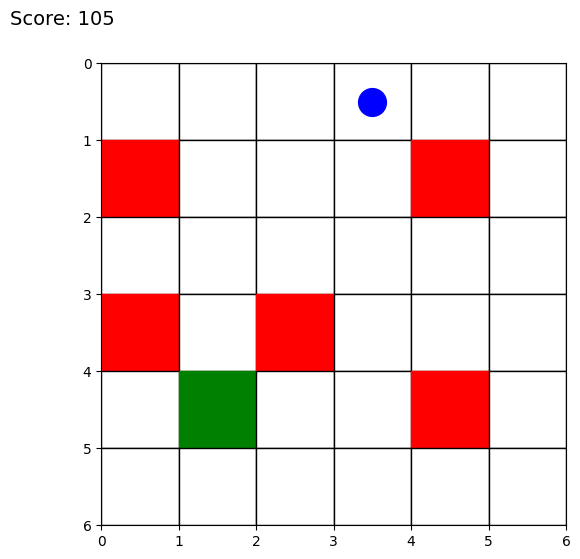

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import random
import time

# Constants
GRID_SIZE = 6
START_POSITION = (0, 0)  # Agent starts at the top-left corner
ACTIONS = ["up", "down", "left", "right"]

# Grid setup: 0 - Empty, 1 - Red (Penalty), 2 - Green (Goal)
def create_grid():
    grid = np.zeros((GRID_SIZE, GRID_SIZE), dtype=int)

    # Set random red squares
    num_red_squares = random.randint(5, 10)
    red_squares = set()
    while len(red_squares) < num_red_squares:
        i, j = random.randint(0, GRID_SIZE-1), random.randint(0, GRID_SIZE-1)
        if (i, j) != START_POSITION:
            red_squares.add((i, j))
    for r in red_squares:
        grid[r] = 1

    return grid, red_squares

def set_green_square(grid):
    green_position = (random.randint(0, GRID_SIZE-1), random.randint(0, GRID_SIZE-1))
    while grid[green_position] == 1:
        green_position = (random.randint(0, GRID_SIZE-1), random.randint(0, GRID_SIZE-1))

    grid[green_position] = 2
    return green_position

# Visualization function
def plot_grid(grid, agent_position, total_reward):
    plt.figure(figsize=(6, 6))
    for i in range(GRID_SIZE):
        for j in range(GRID_SIZE):
            if grid[i, j] == 1:
                plt.fill_between([j, j+1], i, i+1, color='red')
            elif grid[i, j] == 2:
                plt.fill_between([j, j+1], i, i+1, color='green')
            else:
                plt.fill_between([j, j+1], i, i+1, color='white', edgecolor='black')

    # Agent's position
    plt.plot(agent_position[1] + 0.5, agent_position[0] + 0.5, 'bo', markersize=20)

    # Display the score
    plt.text(-0.5, -0.5, f"Score: {total_reward}", fontsize=14, ha='center')

    plt.xlim(0, GRID_SIZE)
    plt.ylim(0, GRID_SIZE)
    plt.gca().invert_yaxis()
    plt.show()

# Define the environment class
class GridEnvironment:
    def __init__(self):
        self.grid, self.red_squares = create_grid()
        self.green_position = set_green_square(self.grid)
        self.agent_position = START_POSITION
        self.is_done = False
        self.failed_moves = set(self.red_squares)  # Track bad moves as initially encountered red squares

    def reset(self):
        # Clear the old green position and set a new one
        self.grid[self.green_position] = 0
        self.green_position = set_green_square(self.grid)
        self.agent_position = START_POSITION
        self.is_done = False
        return self.agent_position

    def step(self, action):
        if self.is_done:
            return self.agent_position, 0, self.is_done

        i, j = self.agent_position
        if action == "up":
            i = max(0, i - 1)
        elif action == "down":
            i = min(GRID_SIZE - 1, i + 1)
        elif action == "left":
            j = max(0, j - 1)
        elif action == "right":
            j = min(GRID_SIZE - 1, j + 1)

        new_position = (i, j)
        reward = -1  # Default penalty

        if self.grid[new_position] == 1:  # Red square
            reward = -1
            self.failed_moves.add(new_position)  # Record the failed move
        elif self.grid[new_position] == 2:  # Green square
            reward = 10
            self.is_done = True
        else:
            if new_position not in self.failed_moves:
                reward = 1

        self.agent_position = new_position
        return new_position, reward, self.is_done

# Define a simple agent that avoids previously encountered bad moves
class SmartAgent:
    def __init__(self, grid_env):
        self.actions = ACTIONS
        self.env = grid_env

    def get_action(self):
        valid_actions = []

        for action in self.actions:
            new_position = self.simulate_move(action)
            if new_position not in self.env.failed_moves:
                valid_actions.append(action)

        return random.choice(valid_actions) if valid_actions else random.choice(self.actions)

    def simulate_move(self, action):
        i, j = self.env.agent_position
        if action == "up":
            i = max(0, i - 1)
        elif action == "down":
            i = min(GRID_SIZE - 1, i + 1)
        elif action == "left":
            j = max(0, j - 1)
        elif action == "right":
            j = min(GRID_SIZE - 1, j + 1)
        return (i, j)

# Initialize environment and agent
env = GridEnvironment()
agent = SmartAgent(env)

# Run the simulation
for episode in range(10):  # Run 10 episodes
    state = env.reset()
    total_reward = 0
    time_gap = 1.0  # Initial time gap

    while not env.is_done:
        clear_output(wait=True)
        plot_grid(env.grid, env.agent_position, total_reward)

        action = agent.get_action()
        next_state, reward, done = env.step(action)
        total_reward += reward

        time.sleep(time_gap)

        if done:
            clear_output(wait=True)
            plot_grid(env.grid, env.agent_position, total_reward)
            time.sleep(time_gap * 3)  # Stay on the green square for some time
            break  # End the current episode

    time_gap = 1.0  # Reset the time gap after each episode
    print(f"Episode {episode + 1} finished with total reward: {total_reward}")

clear_output(wait=True)
plot_grid(env.grid, env.agent_position, total_reward)
